In [10]:
%pylab inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from yahoo_finance import Share
import datetime

from datetime import datetime
import sys
sys.path.append('../')
import get_symbols
import os
import seaborn
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.tools.shortcuts import buildNetwork

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
symbols  = get_symbols.main()

In [4]:
backresids = pd.DataFrame()
forwardresids = pd.DataFrame()
for symbol in symbols[:5]:
    start='2005-02-15'
    end = '2016-02-15'
    data = pd.DataFrame(Share(symbol).get_historical(start, end))
    data.Date = [datetime.strptime(data.Date.iloc[i], '%Y-%m-%d') for i in data.index]
    data.index = data.Date
    data = data.iloc[::-1]
    data.Close = [float(x) for x in data.Adj_Close]
    close_ = data.Close
    backresid = (close_-close_.shift(100))/close_.shift(100)
    forwardresid = (close_.shift(-100)-close_)/close_
    print(len(close_))
    backresids[symbol] = backresid
    forwardresids[symbol] = forwardresid

2768
2768
2768
2768
2768


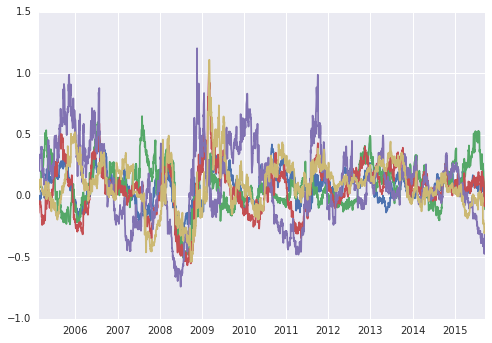

In [5]:
#plt.plot(backresids)
plt.plot(forwardresids)

/home/ubuntu/anaconda3/lib/python3.5/site-packages/pandas/computation/expressions.py:190: UserWarning: evaluating in Python space because the '-' operator is not supported by numexpr for the bool dtype, use '^' instead
  unsupported[op_str]))


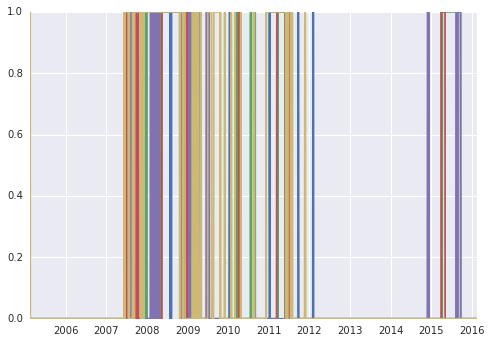

In [64]:
plt.plot((forwardresids>.55)-(forwardresids<-.15))

In [80]:
binary_forward = ((forwardresids>.20)+0)-((forwardresids<-.2)+0)

In [41]:
len(close_)

2716

In [24]:
close_ = data.Close

In [25]:
close_ = (close_-close_.shift(100))/close_.shift(100)

In [26]:
close_.tail()

Date
2016-02-08   -0.003268
2016-02-09   -0.009039
2016-02-10   -0.004211
2016-02-11   -0.013737
2016-02-12    0.006905
Name: Close, dtype: float64

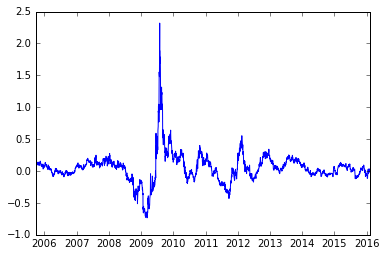

In [32]:
plt.plot(close_)


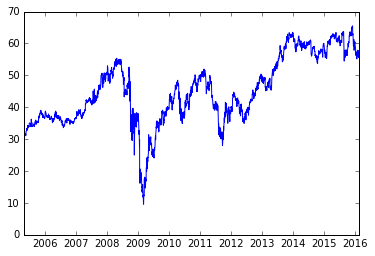

In [33]:
plt.plot(data.Close)

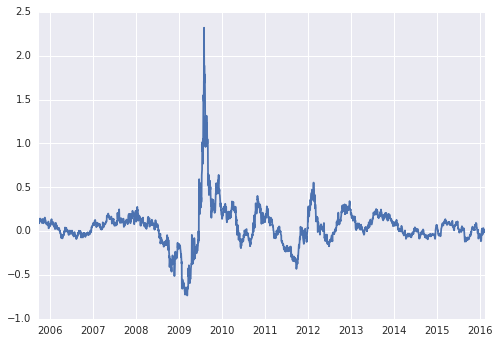

In [40]:
plt.plot(close_.dropna())

In [12]:
net = buildNetwork(2, 3, 1, bias=True, hiddenclass=TanhLayer)

NameError: name 'TanhLayer' is not defined

In [7]:
import pybrain

In [13]:
from pybrain.datasets import SupervisedDataSet

In [45]:
ds = SupervisedDataSet(5,5)
ds.setField( 'input', backresids[100:-100] )
ds.setField( 'target', forwardresids[100:-100] )
TrainDS, TestDS = ds.splitWithProportion(0.8)

In [46]:
#y_train = y_train.reshape( -1, 1 )  

In [47]:
input_size = 5
target_size = 5
hidden_size = 2

In [48]:
net = buildNetwork( input_size, hidden_size, target_size, bias = True )   ###BIAS??
trainer = BackpropTrainer( net, TrainDS )

In [59]:
trainer.trainUntilConvergence( verbose = True, validationProportion = 0.15, maxEpochs = 500, continueEpochs = 10 )

('train-errors:', '[0.02073  , 0.020753 , 0.020719 , 0.020711 , 0.02074  , 0.020758 , 0.02067  , 0.020741 , 0.020705 , 0.020765 , 0.020744 , 0.020735 , 0.020723 , 0.020724 , 0.020746 , 0.020687 , 0.020724 , 0.020703 , 0.020684 , 0.020729 , 0.020685 , 0.020695 , 0.020723 , 0.020655 , 0.020704 , 0.020716 , 0.020695 , 0.020685 , 0.020717 , 0.020683 , 0.020701 , 0.020706 , 0.020679 , 0.020686 , 0.020706 , 0.020615 , 0.020649 , 0.020665 , 0.020688 , 0.020672 , 0.020691 , 0.0207   , 0.020668 , 0.020698 , 0.02066  , 0.020651 , 0.020659 , 0.02065  , 0.020675 , 0.020679 , 0.020657 , 0.02067  , 0.020679 , 0.020663 , 0.020591 , 0.020638 , 0.020676 , 0.020636 , 0.020666 , 0.02061  , 0.020623 , 0.020646 , 0.020634 , 0.020614 , 0.02065  , 0.020627 , 0.020644 , 0.020641 , 0.020611 , 0.020626 , 0.020626 , 0.02063  , 0.02059  , 0.020605 , 0.020597 , 0.02059  , 0.020599 , 0.02063  , 0.020601 , 0.020577 , 0.020581 , 0.020626 , 0.020587 , 0.020612 , 0.020583 , 0.020624 , 0.020608 , 0.020599 , 0.020532 , 0

([0.020729842937661055,
  0.020752901973004834,
  0.020718629659375452,
  0.020711319901509997,
  0.020739522375377472,
  0.020757557788246197,
  0.02066993319856501,
  0.020740822575879583,
  0.020705055205114248,
  0.020765039289176845,
  0.02074362868631555,
  0.0207349476268631,
  0.020723454548226664,
  0.020724145922723033,
  0.020745698494605919,
  0.020687000184175956,
  0.020724053254837296,
  0.020703161736743889,
  0.020684068543054747,
  0.020728810160195663,
  0.020684670720646902,
  0.020695369216702876,
  0.020722659229566735,
  0.020655241824974788,
  0.020704367626855895,
  0.020716297018775781,
  0.020695175132980512,
  0.020685403183899415,
  0.020716724758266237,
  0.020682782026737373,
  0.020701049468670202,
  0.020706258330053781,
  0.020679251433717617,
  0.020686270378953257,
  0.02070580311297892,
  0.020615031697667457,
  0.020648888942230732,
  0.02066487816655127,
  0.020687772195648421,
  0.02067155171753746,
  0.020691288555764218,
  0.020699772579639657,

In [50]:
p = net.activateOnDataset( TestDS )

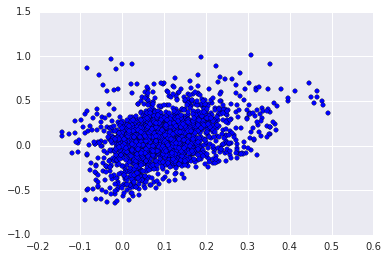

In [62]:
plt.scatter(p, TestDS['target'])

In [60]:
q = net.activateOnDataset( TestDS )

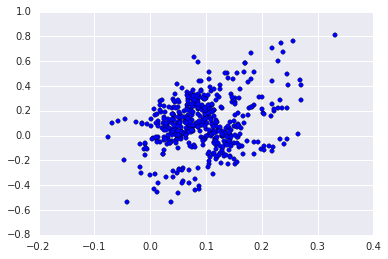

In [78]:
plt.scatter(q[:,4], TestDS['target'][:,4])

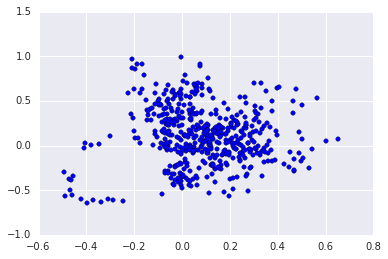

In [88]:
plt.scatter(TestDS['target'][:,1], TestDS['target'][:,3])

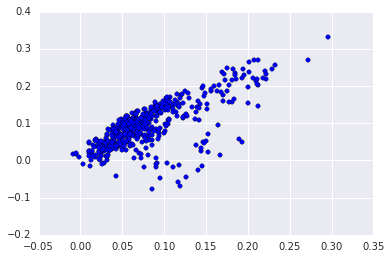

In [91]:
plt.scatter(q[:,0], q[:,4])

In [93]:
q>.5

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       ..., 
       [False, False, False, False, False],
       [False, False, False,  True, False],
       [False, False, False, False, False]], dtype=bool)

In [39]:
TrainDS, TestDS = ds.splitWithProportion(0.8)

In [73]:
q[:,0]

array([ 0.10084545,  0.0761411 ,  0.03881888,  0.06662894,  0.09395461,
        0.05213523,  0.0466878 ,  0.08574957,  0.067271  ,  0.00978663,
        0.0392951 ,  0.04452405,  0.05813752,  0.07262818,  0.08569064,
        0.16950017,  0.013053  ,  0.10177437,  0.05734922,  0.04499036,
        0.10023524,  0.02162769,  0.05359234,  0.0532385 ,  0.08730304,
        0.11986687,  0.07789654,  0.07623509,  0.03197433,  0.06191362,
        0.05172715,  0.0321738 ,  0.06323267,  0.07283062,  0.0847022 ,
        0.08969622,  0.14469602,  0.05362129, -0.00216979,  0.08161836,
        0.06605312,  0.03841062,  0.04628991,  0.03918009,  0.03908939,
        0.08955926,  0.06916287,  0.14013199,  0.14076674,  0.08242403,
        0.14521671,  0.05524367,  0.04296715,  0.06180234,  0.07966744,
        0.04613492,  0.04673376,  0.18132758,  0.02575193,  0.07372925,
        0.04960837,  0.04789307,  0.04869513,  0.07205277,  0.02430654,
        0.06341832,  0.08581316,  0.03073803,  0.20189223,  0.16